# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

import graphviz

%matplotlib inline

In [2]:
# train
X_ = pd.read_csv('./input/X_train.csv', index_col=[0, 1])
y_ = pd.read_csv('./input/y_train.csv', index_col=[0, 1])

# test
y_test = pd.read_csv('./input/y_test.csv', index_col=[0, 1])
X_test = pd.read_csv('./input/X_test.csv', index_col=[0, 1])

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=.25, random_state=1729)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [4]:
clf = DecisionTreeClassifier(random_state=23600873, max_depth=4).fit(X_train, y_train)

dot_data = export_graphviz(clf,
                           out_file=None,
                           feature_names=X_train.columns,
                           filled=True)

graph = graphviz.Source(dot_data, filename='clf-3-melhores-arvores', format='png')
graph.view()

'clf-3-melhores-arvores.png'

In [5]:
importancia_das_variaveis = pd.Series(clf.feature_importances_, index=X_train.columns)
importancia_das_variaveis.sort_values(ascending=False, inplace=True)
importancia_das_variaveis.head(3)

57 tGravityAcc-energy()-X    0.280288
272 fBodyAcc-mad()-X         0.253431
560 angle(Y,gravityMean)     0.172169
dtype: float64

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [6]:
X_train_cut = X_train[['57 tGravityAcc-energy()-X', '272 fBodyAcc-mad()-X', '560 angle(Y,gravityMean)']]
X_valid_cut = X_valid[['57 tGravityAcc-energy()-X', '272 fBodyAcc-mad()-X', '560 angle(Y,gravityMean)']]
X_test_cut = X_test[['57 tGravityAcc-energy()-X', '272 fBodyAcc-mad()-X', '560 angle(Y,gravityMean)']]

In [7]:
clf = DecisionTreeClassifier(random_state=2360873, max_depth=20).fit(X_train_cut, y_train)

In [8]:
path = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train_cut, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 8.20831765e-06, 9.39535465e-06, 9.49128466e-06,
       1.07333467e-05, 1.08458327e-05, 1.12920114e-05, 1.17722671e-05,
       1.21895384e-05, 1.34250950e-05, 1.43573933e-05, 1.63037704e-05,
       1.76222085e-05, 3.46682094e-05, 3.99333166e-05, 4.57201379e-05,
       4.59320888e-05, 4.91589175e-05, 5.22605487e-05, 5.96152891e-05,
       6.01299592e-05, 6.44380405e-05, 9.75199777e-05, 1.06592343e-04,
       1.14476413e-04, 1.18302802e-04, 1.20258905e-04, 1.40047556e-04,
       1.70320047e-04, 1.78021254e-04, 1.80820169e-04, 2.02240028e-04,
       2.06925985e-04, 2.07446262e-04, 2.14231212e-04, 2.22127881e-04,
       2.45914915e-04, 2.94802358e-04, 3.58248933e-04, 3.85536930e-04,
       3.96810131e-04, 4.26794338e-04, 4.77393661e-04, 4.87200267e-04,
       4.94160789e-04, 5.44448651e-04, 5.54164516e-04, 6.08564959e-04,
       6.22822583e-04, 6.59105964e-04, 6.60935583e-04, 7.76155292e-04,
       8.55103568e-04, 9.20943028e-04, 1.01351821e-03, 1.02296920e-03,
      

In [9]:
ccp_alphas = ccp_alphas[::1]
ccp_alphas

array([0.00000000e+00, 8.20831765e-06, 9.39535465e-06, 9.49128466e-06,
       1.07333467e-05, 1.08458327e-05, 1.12920114e-05, 1.17722671e-05,
       1.21895384e-05, 1.34250950e-05, 1.43573933e-05, 1.63037704e-05,
       1.76222085e-05, 3.46682094e-05, 3.99333166e-05, 4.57201379e-05,
       4.59320888e-05, 4.91589175e-05, 5.22605487e-05, 5.96152891e-05,
       6.01299592e-05, 6.44380405e-05, 9.75199777e-05, 1.06592343e-04,
       1.14476413e-04, 1.18302802e-04, 1.20258905e-04, 1.40047556e-04,
       1.70320047e-04, 1.78021254e-04, 1.80820169e-04, 2.02240028e-04,
       2.06925985e-04, 2.07446262e-04, 2.14231212e-04, 2.22127881e-04,
       2.45914915e-04, 2.94802358e-04, 3.58248933e-04, 3.85536930e-04,
       3.96810131e-04, 4.26794338e-04, 4.77393661e-04, 4.87200267e-04,
       4.94160789e-04, 5.44448651e-04, 5.54164516e-04, 6.08564959e-04,
       6.22822583e-04, 6.59105964e-04, 6.60935583e-04, 7.76155292e-04,
       8.55103568e-04, 9.20943028e-04, 1.01351821e-03, 1.02296920e-03,
      

In [10]:
%%time

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train_cut, y_train)
    clfs.append(clf) 

CPU times: total: 2.34 s
Wall time: 2.86 s


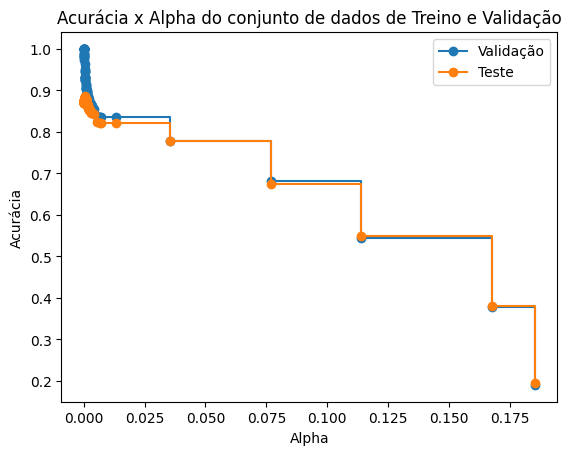

In [11]:
train_scores = [clf.score(X_train_cut, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid_cut, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x Alpha do conjunto de dados de Treino e Validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="Validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="Teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [12]:
ind_best_tree = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
best_tree = clfs[ind_best_tree]

print(f"Acurácia da melhor árvore na base de validação: {valid_scores[ind_best_tree]*100:.2f}%")

best_tree

Acurácia da melhor árvore na base de validação: 88.57%


DecisionTreeClassifier(ccp_alpha=0.0004773936614943146, random_state=2360873)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 72.28%


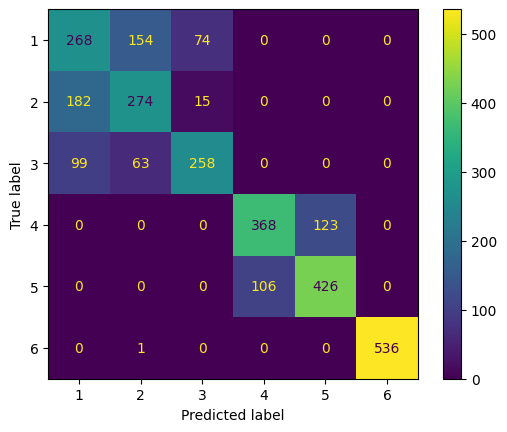

In [13]:
acuracia_test = best_tree.score(X_test_cut, y_test)

print(f"Acurácia: {acuracia_test*100:.2f}%")
ConfusionMatrixDisplay.from_estimator(best_tree, X_test_cut, y_test)
